In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Unified Mentor Projects\uber_new_dataset.csv")

In [3]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15:22.0,8.5,2009-01-01 01:15:22 UTC,-73.981918,40.779456,-73.957685,40.771043,2
1,59:17.0,13.0,2009-01-01 01:59:17 UTC,-73.983759,40.721389,-73.994833,40.687179,2
2,05:03.0,10.6,2009-01-01 02:05:03 UTC,-73.956635,40.771254,-73.991528,40.749778,2
3,09:13.0,12.2,2009-01-01 02:09:13 UTC,-73.984605,40.728020,-73.955746,40.776830,1
4,13:41.0,11.0,2009-01-01 02:13:41 UTC,-73.980127,40.737425,-74.009544,40.726025,4
...,...,...,...,...,...,...,...,...
199995,57:53.0,18.5,2015-06-30 22:57:53 UTC,-73.971703,40.782207,-73.943680,40.827991,2
199996,16:42.0,25.5,2015-06-30 23:16:42 UTC,-74.001099,40.730961,-73.957123,40.806908,2
199997,31:06.0,20.0,2015-06-30 23:31:06 UTC,-73.999962,40.733135,-73.962448,40.773041,4
199998,33:33.0,8.5,2015-06-30 23:33:33 UTC,-73.980988,40.762020,-73.960083,40.770531,1


In [4]:
df.isnull().sum()  # Check for missing values
df.duplicated().sum()  # Check for duplicates


0

In [5]:
df.drop(columns=['key'], inplace=True)

# Feature Engineering

In [7]:
# Extract date features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month

In [8]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [9]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,1,Thursday,1
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,1,Thursday,1
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2,Thursday,1
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,2,Thursday,1
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,2,Thursday,1
...,...,...,...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,22,Tuesday,6
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,23,Tuesday,6
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,23,Tuesday,6
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,23,Tuesday,6


In [10]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df['distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])


In [11]:
# Calculating fare per kilometer, using the distance generated
# Calculate fare per km
df['fare_per_km'] = df['fare_amount'] / df['distance']

In [12]:
# Handle any Possible infinite or nan values
# Replace infinite values or NaN values in fare_per_km
df['fare_per_km'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['fare_per_km'].fillna(0, inplace=True)

In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,distance,fare_per_km
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,1,Thursday,1,2.244765,3.786588
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,1,Thursday,1,3.916842,3.319001
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,2,Thursday,1,3.786736,2.799244
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,2,Thursday,1,5.946957,2.051469
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,2,Thursday,1,2.784022,3.951118
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,22,Tuesday,6,5.610774,3.297228
199996,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,23,Tuesday,6,9.221233,2.765357
199997,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,23,Tuesday,6,5.447442,3.671448
199998,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,23,Tuesday,6,1.998738,4.252683


In [14]:
# Check for NaN values in the relevant columns
print(df[['fare_per_km', 'distance', 'passenger_count']].isnull().sum())

fare_per_km        0
distance           1
passenger_count    0
dtype: int64


In [15]:
# Drop rows where distance is NaN
df.dropna(subset=['distance'], inplace=True)

In [16]:
from sklearn.ensemble import IsolationForest

# Use relevant columns for anomaly detection
X = df[['fare_per_km', 'distance', 'passenger_count']]

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination level as needed
#df['anomaly'] = iso_forest.fit_predict(X)

# Ensure the input to predict also has column names (like the training data)
df['anomaly'] = iso_forest.fit_predict(df[['fare_per_km', 'distance', 'passenger_count']])

# Filter for anomalous trips
fraudulent_trips = df[df['anomaly'] == -1]
print(fraudulent_trips)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


        fare_amount           pickup_datetime  pickup_longitude  \
22             6.50 2009-01-01 12:49:05+00:00        -74.689571   
84             2.50 2009-01-02 12:26:51+00:00        -73.994285   
108           45.00 2009-01-02 20:44:41+00:00        -73.776740   
131           14.60 2009-01-03 00:51:01+00:00        -73.922683   
158           35.70 2009-01-03 12:30:00+00:00        -73.979965   
...             ...                       ...               ...   
199465         3.00 2015-06-23 12:21:16+00:00        -73.985115   
199601         2.50 2015-06-25 11:49:53+00:00        -73.954498   
199688         4.00 2015-06-26 13:27:42+00:00          0.000000   
199886        12.00 2015-06-29 09:04:46+00:00        -73.980919   
199939        75.54 2015-06-30 02:01:49+00:00        -73.703262   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
22            45.031653         -74.689603         45.031598                1   
84            40.754210         -

In [17]:
# Filter for anomalous trips (fraudulent ones)
fraudulent_trips = df[df['anomaly'] == -1]

# Summary statistics for fraudulent trips
print(fraudulent_trips.describe())

# Example: Analyze if certain pickup locations are prone to fraud
print(fraudulent_trips[['pickup_longitude', 'pickup_latitude']].head())


       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  2000.000000       2000.000000      2000.000000        2000.000000   
mean     22.830620        -68.105118        38.089571         -67.971371   
std      27.045825         52.458600        48.120136          82.929075   
min     -52.000000      -1340.648410       -73.962430       -3356.666300   
25%       4.500000        -73.989580        40.694843         -73.989583   
50%      11.000000        -73.970980        40.745866         -73.971679   
75%      44.500000        -73.859379        40.764079         -73.893847   
max     499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count        hour        month  \
count       2000.000000       2000.00000  2000.00000  2000.000000   
mean          37.046067          2.55000    12.97050     6.378500   
std           32.113436          4.97593     6.55035     3.444876   
min         -881.985513          0.0000

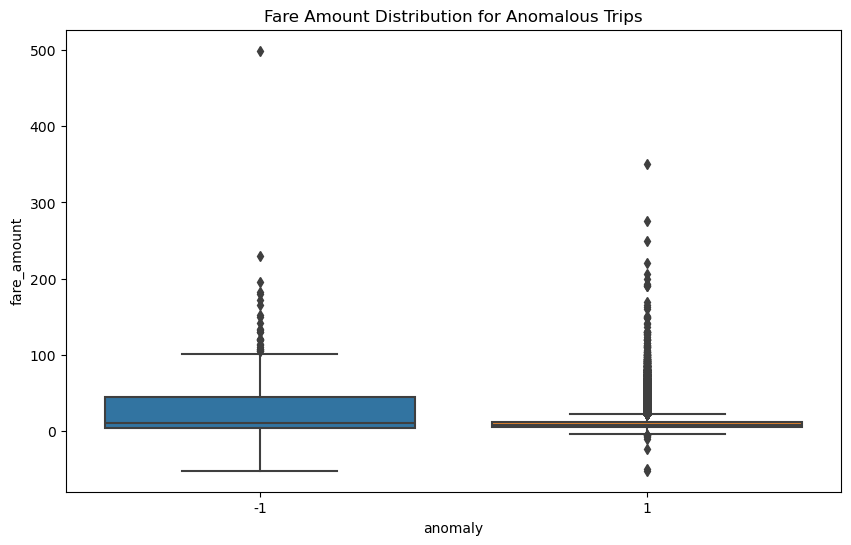

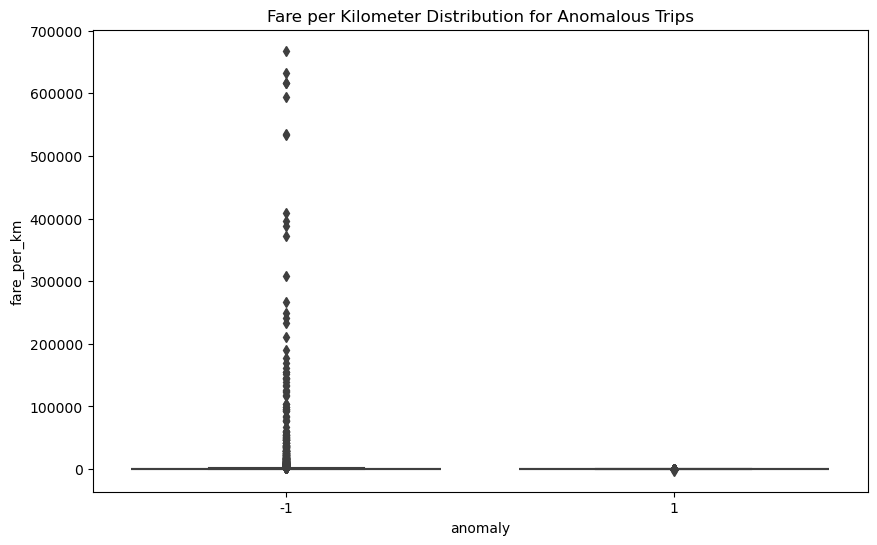

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize fare amounts for flagged trips
plt.figure(figsize=(10,6))
sns.boxplot(x='anomaly', y='fare_amount', data=df)
plt.title("Fare Amount Distribution for Anomalous Trips")
plt.show()

# Visualize fare per kilometer for flagged trips
plt.figure(figsize=(10,6))
sns.boxplot(x='anomaly', y='fare_per_km', data=df)
plt.title("Fare per Kilometer Distribution for Anomalous Trips")
plt.show()


In [19]:
# Count anomalies and normal points
anomaly_counts = df['anomaly'].value_counts()
total_rows = df.shape[0]

print(f"Total rows in dataset: {total_rows}")
print(f"Anomalies flagged: {anomaly_counts[-1]} ({(anomaly_counts[-1]/total_rows)*100:.2f}%)")
print(f"Normal points: {anomaly_counts[1]} ({(anomaly_counts[1]/total_rows)*100:.2f}%)")

Total rows in dataset: 199999
Anomalies flagged: 2000 (1.00%)
Normal points: 197999 (99.00%)


In [20]:
# Display the top anomalous trips based on fare per km
fraudulent_trips = df[df['anomaly'] == -1].sort_values(by='fare_per_km', ascending=False)
print(fraudulent_trips[['fare_amount', 'distance', 'passenger_count', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head())

        fare_amount  distance  passenger_count           pickup_datetime  \
154139        113.0  0.000169                2 2013-12-06 02:17:00+00:00   
69311         499.0  0.000790                1 2011-04-10 04:10:00+00:00   
158156         52.0  0.000084                1 2014-01-25 03:31:46+00:00   
176380         52.0  0.000084                1 2014-08-31 20:02:06+00:00   
12489          50.0  0.000084                1 2009-05-28 19:40:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  
154139        -74.468770        40.476630         -74.468772         40.476630  
69311         -73.968377        40.764602         -73.968368         40.764600  
158156        -74.030855        40.740735         -74.030856         40.740735  
176380        -73.789883        40.647023         -73.789882         40.647023  
12489         -73.977602        40.782908         -73.977603         40.782908  


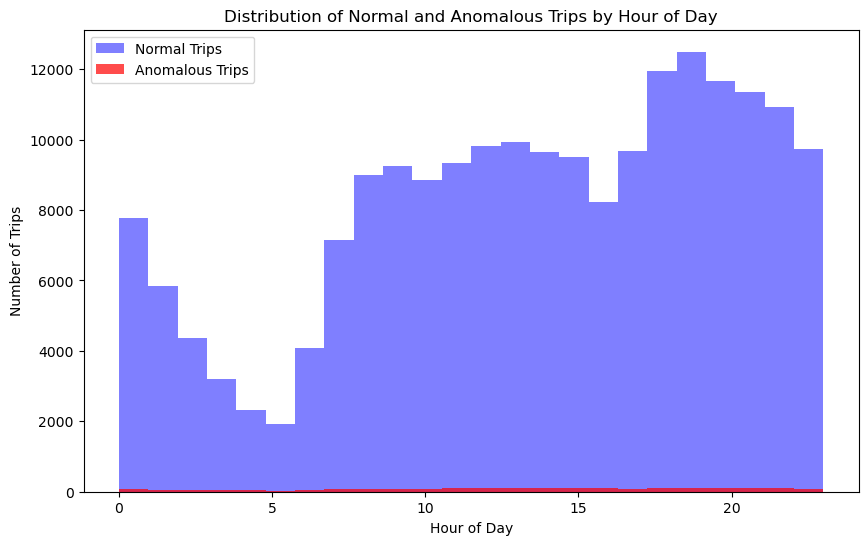

22        12
84        12
108       20
131        0
158       12
          ..
199465    12
199601    11
199688    13
199886     9
199939     2
Name: hour, Length: 2000, dtype: int32

In [21]:
# Time of day analysis:  To check if anomalies are concentrated during certain hours, such as late-night hours when fraud might be more likely.
# Create a new column for the hour of the day (from pickup_datetime)
#df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Compare normal trips and anomalous trips based on the hour of the day
normal_hours = df[df['anomaly'] == 1]['hour']
anomalous_hours = df[df['anomaly'] == -1]['hour']

# Plot the distributions of normal and anomalous trips by hour
plt.figure(figsize=(10, 6))
plt.hist(normal_hours, bins=24, alpha=0.5, label='Normal Trips', color='blue')
plt.hist(anomalous_hours, bins=24, alpha=0.7, label='Anomalous Trips', color='red')
plt.title('Distribution of Normal and Anomalous Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()


anomalous_hours

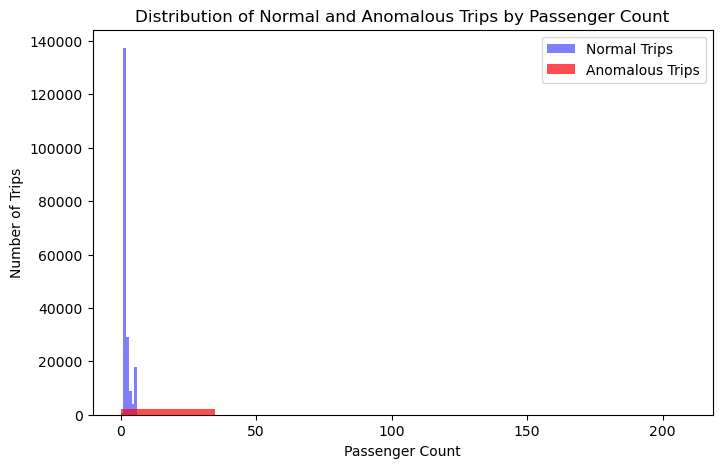

In [22]:

# Compare normal trips and anomalous trips based on passenger count
normal_passengers = df[df['anomaly'] == 1]['passenger_count']
anomalous_passengers = df[df['anomaly'] == -1]['passenger_count']

# Plot the distributions of normal and anomalous trips by passenger count
plt.figure(figsize=(8, 5))
plt.hist(normal_passengers, bins=6, alpha=0.5, label='Normal Trips', color='blue')
plt.hist(anomalous_passengers, bins=6, alpha=0.7, label='Anomalous Trips', color='red')
plt.title('Distribution of Normal and Anomalous Trips by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()



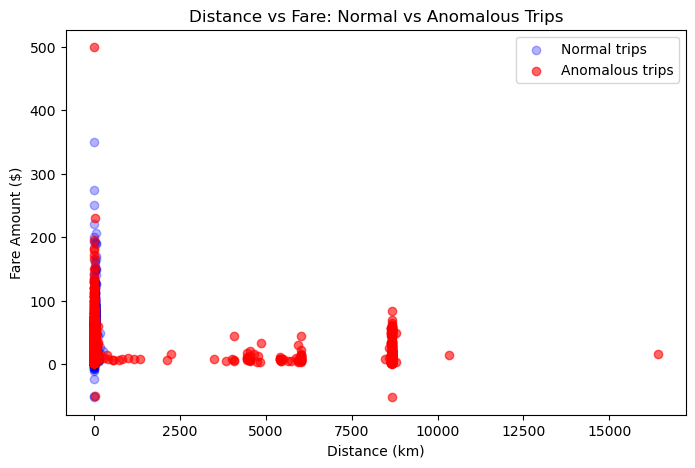

In [24]:

plt.figure(figsize=(8, 5))
plt.scatter(df[df['anomaly'] == 1]['distance'], df[df['anomaly'] == 1]['fare_amount'], alpha=0.3, color='blue', label='Normal trips')
plt.scatter(df[df['anomaly'] == -1]['distance'], df[df['anomaly'] == -1]['fare_amount'], alpha=0.6, color='red', label='Anomalous trips')
plt.title('Distance vs Fare: Normal vs Anomalous Trips')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.show()


In [25]:
# Check the distribution of anomalies
print(df['anomaly'].value_counts())

anomaly
 1    197999
-1      2000
Name: count, dtype: int64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


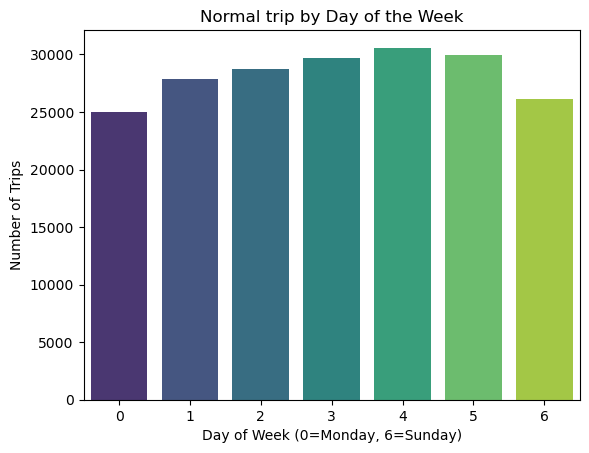

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


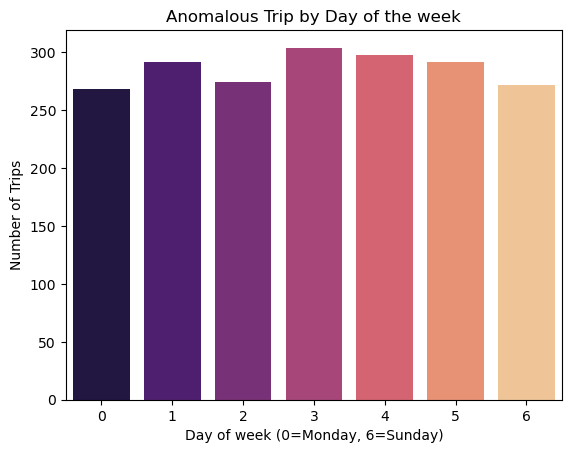

In [26]:
import seaborn as sns


# Ensure 'pickup_datetime' is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract 'day_of_week' and 'month' columns
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['pickup_datetime'].dt.month

# Convert day_of_week and month to categorical
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')

# Plot normal trips by day of the week (Counts on y-axis)
sns.countplot(x='day_of_week', data=df[df['anomaly'] ==1], palette="viridis")
plt.title('Normal trip by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')  # This is the y-axis (default)
plt.show()

# Plot anomalous trips by day of the week (Counts on y-axis)
sns.countplot(x='day_of_week', data=df[df['anomaly'] == -1], palette="magma")
plt.title('Anomalous Trip by Day of the week')
plt.xlabel('Day of week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')  # This is the y-axis (default)
plt.show()


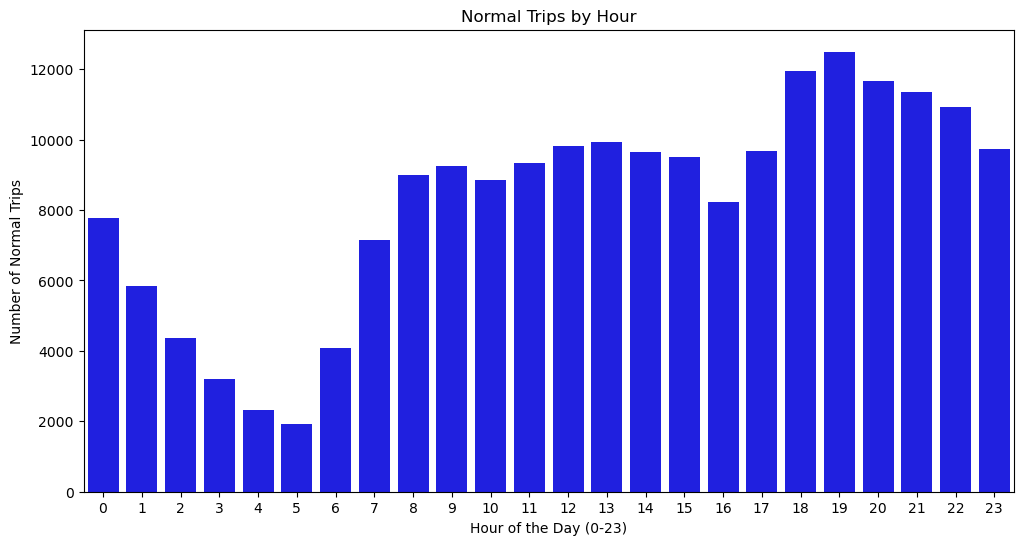

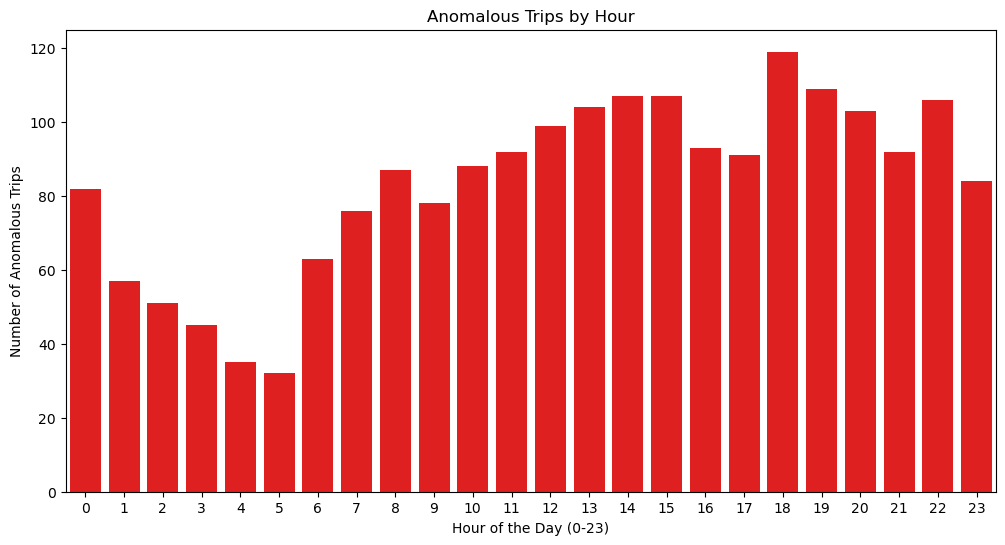

In [27]:
# Plot normal trips by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df[df['anomaly'] == 1], color='blue')
plt.title('Normal Trips by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Normal Trips')
plt.show()

# Plot anomalous trips by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df[df['anomaly'] == -1], color='red')
plt.title('Anomalous Trips by Hour')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Anomalous Trips')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


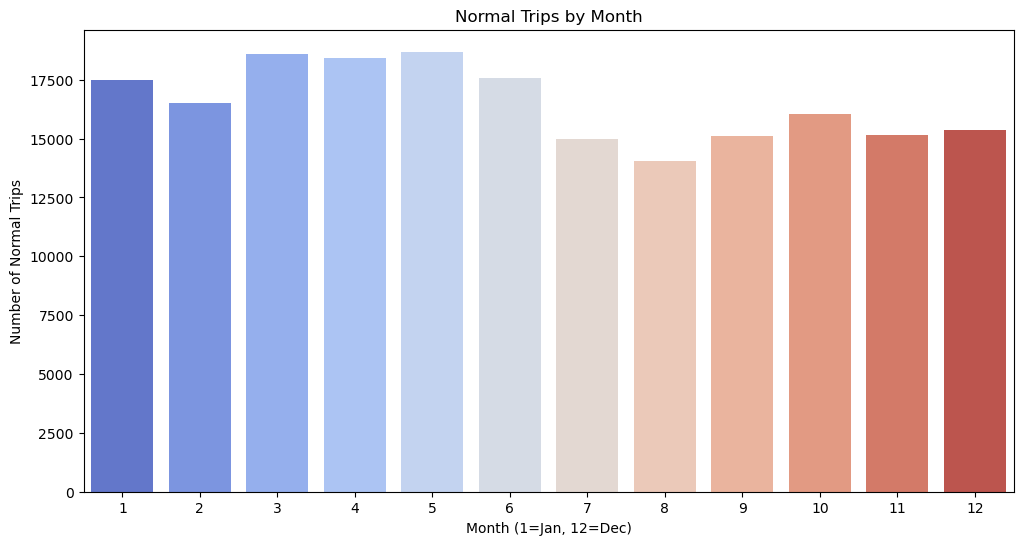

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


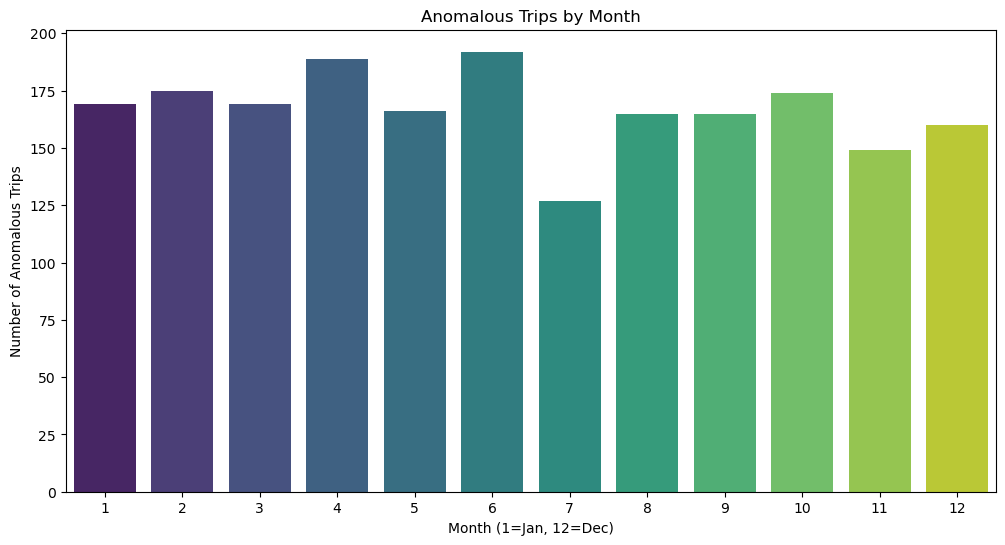

In [28]:
# Analyze seasonal trends
# Plot normal trips by month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df[df['anomaly'] == 1], palette="coolwarm")
plt.title('Normal Trips by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Normal Trips')
plt.show()

# Plot anomalous trips by month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df[df['anomaly'] == -1], palette="viridis")
plt.title('Anomalous Trips by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Anomalous Trips')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


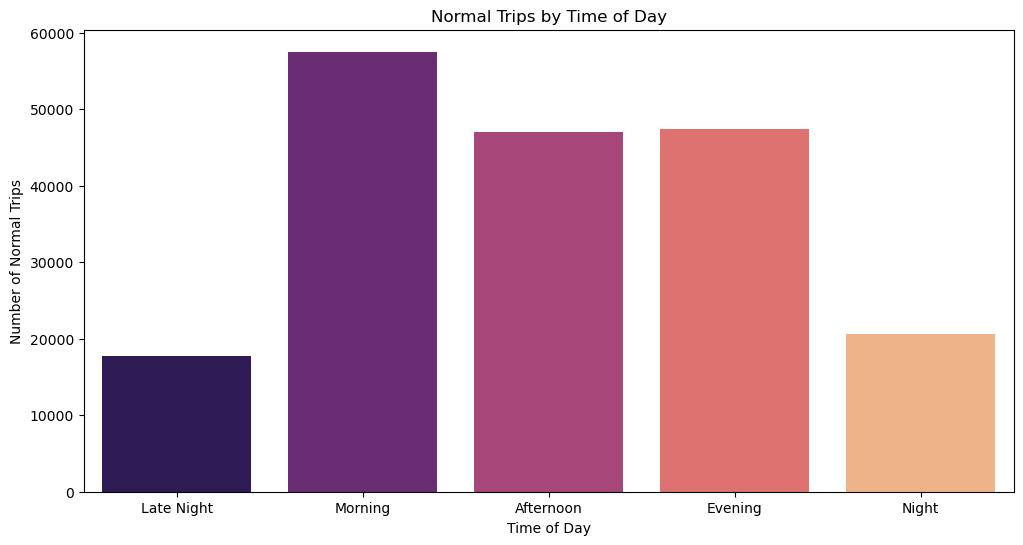

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


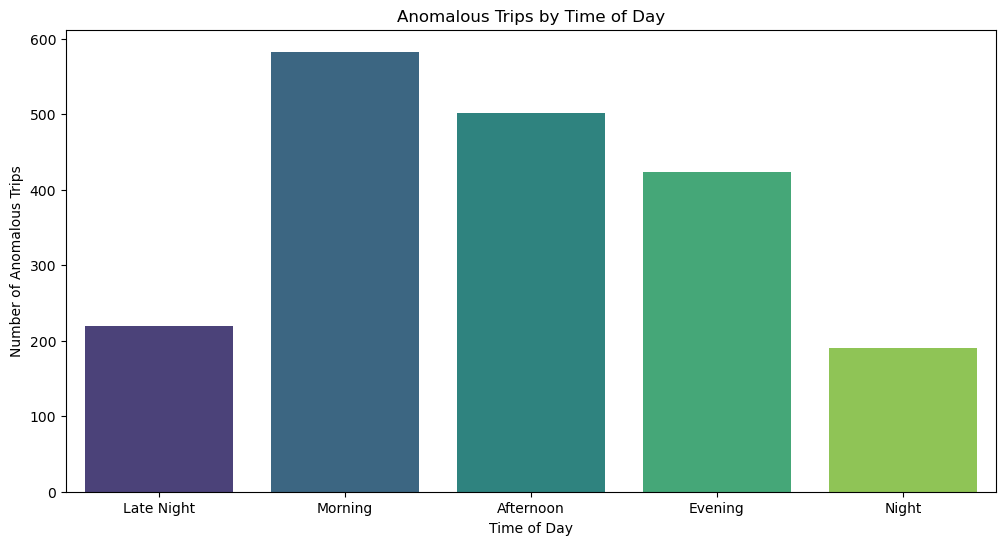

In [29]:
# Categorize hours into time of day: Night (0-5), Morning (5-12), Afternoon (12-17), Evening (17-21), Night (21-24)
df['time_of_day'] = pd.cut(df['hour'], 
                           bins=[0, 5, 12, 17, 21, 24], 
                           labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'], 
                           include_lowest=False, 
                           ordered=False)

# Plot normal trips by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_day', data=df[df['anomaly'] == 1], palette="magma")
plt.title('Normal Trips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Normal Trips')
plt.show()

# Plot anomalous trips by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_day', data=df[df['anomaly'] == -1], palette="viridis")
plt.title('Anomalous Trips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Anomalous Trips')
plt.show()


Number of normal trips: 197999
Number of anomalous trips: 2000
Plotting pickup locations for normal and anomalous trips...


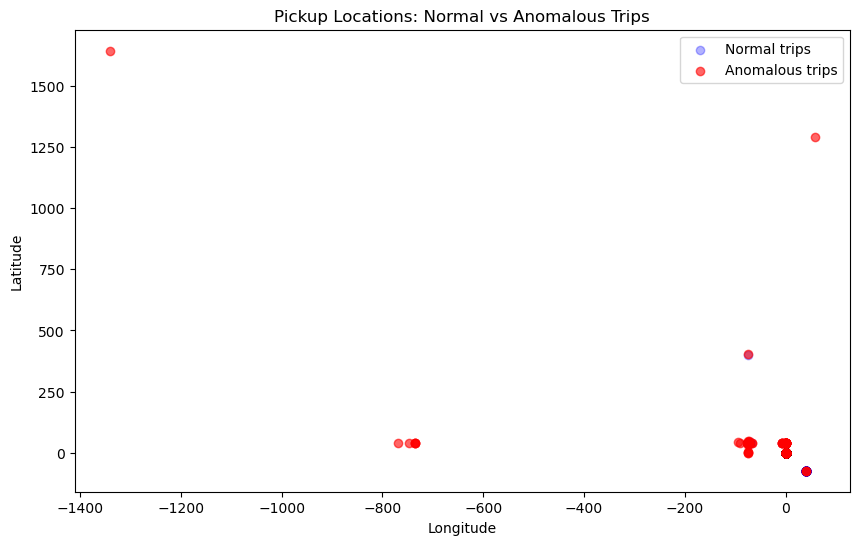

Plotting dropoff locations for normal and anomalous trips...


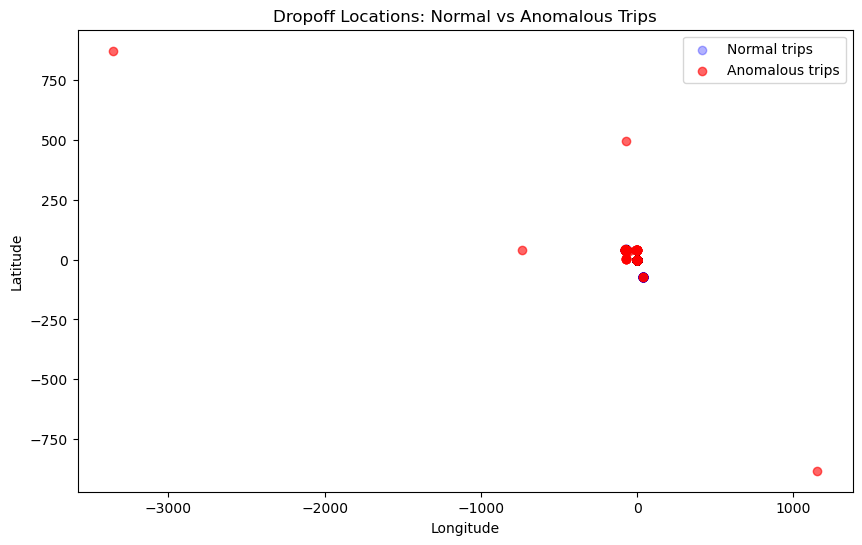

Geographical analysis completed.


In [30]:

# Log the number of normal and anomalous trips
print(f"Number of normal trips: {len(df[df['anomaly'] == 1])}")
print(f"Number of anomalous trips: {len(df[df['anomaly'] == -1])}")

# Pickup locations plot with logging
plt.figure(figsize=(10, 6))
print("Plotting pickup locations for normal and anomalous trips...")
plt.scatter(df[df['anomaly'] == 1]['pickup_longitude'], 
            df[df['anomaly'] == 1]['pickup_latitude'], 
            color='blue', alpha=0.3, label='Normal trips')
plt.scatter(df[df['anomaly'] == -1]['pickup_longitude'], 
            df[df['anomaly'] == -1]['pickup_latitude'], 
            color='red', alpha=0.6, label='Anomalous trips')
plt.title('Pickup Locations: Normal vs Anomalous Trips')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Dropoff locations plot with logging
plt.figure(figsize=(10, 6))
print("Plotting dropoff locations for normal and anomalous trips...")
plt.scatter(df[df['anomaly'] == 1]['dropoff_longitude'], 
            df[df['anomaly'] == 1]['dropoff_latitude'], 
            color='blue', alpha=0.3, label='Normal trips')
plt.scatter(df[df['anomaly'] == -1]['dropoff_longitude'], 
            df[df['anomaly'] == -1]['dropoff_latitude'], 
            color='red', alpha=0.6, label='Anomalous trips')
plt.title('Dropoff Locations: Normal vs Anomalous Trips')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

print("Geographical analysis completed.")
